In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import feature_selection

In [2]:
emp = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
emp.shape

(1470, 35)

In [5]:
emp.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
emp.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
emp.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
emp.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [9]:
emp.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
emp.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [11]:
emp.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# Finidng Unique values of String or object Columns

In [12]:
emp.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [13]:
emp.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [14]:
emp.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [15]:
emp.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [16]:
emp.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [17]:
emp.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [18]:
emp.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [19]:
emp.OverTime.unique()

array(['Yes', 'No'], dtype=object)

In [20]:
emp.Over18.unique()

array(['Y'], dtype=object)

# Number of Employees who Left Company

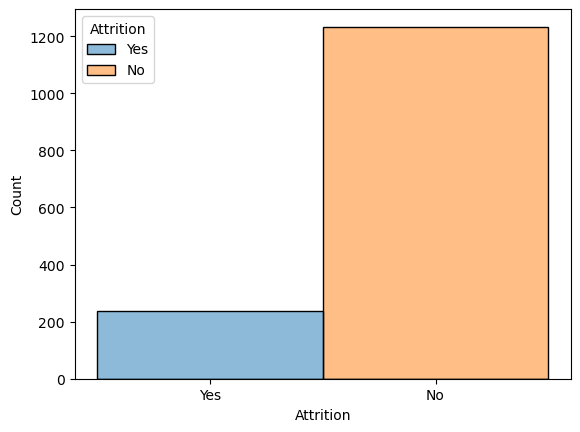

In [21]:
sns.histplot(data = emp, x = "Attrition",hue = "Attrition")

plt.savefig('Attrition.png')

In [22]:
emp.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# Gender wise Employees

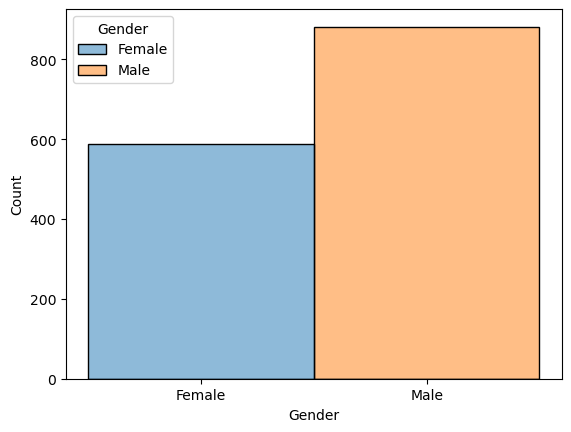

In [23]:
sns.histplot(data = emp, x = "Gender",hue = "Gender")

plt.savefig('AttritionByGender.png')

# Created function data2 which have data who left company

In [24]:
data2 = emp[emp["Attrition"]=="Yes"]

In [25]:
data2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3


# Leavers by Gender

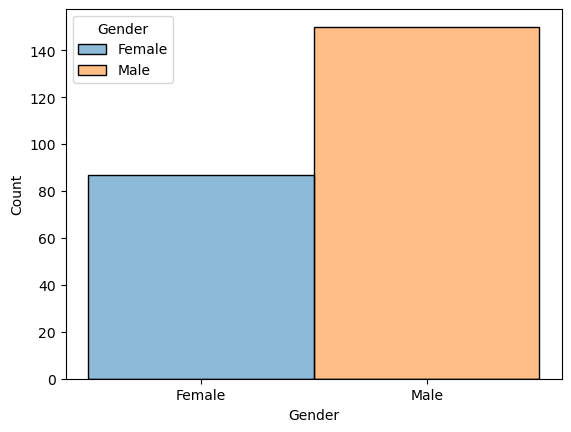

In [26]:
sns.histplot(data = data2, x = "Gender", hue = "Gender")

plt.savefig('AttritionByGenderleavers.png')

In [27]:
data2.Gender.value_counts()

Male      150
Female     87
Name: Gender, dtype: int64

# Leavers By age

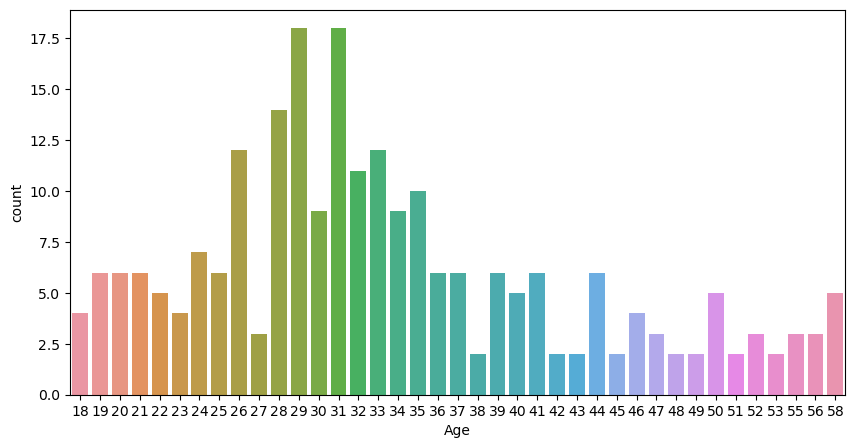

In [28]:
sns.countplot(data=data2, x="Age", figure=plt.figure(figsize=(10, 5)))

plt.savefig('AttritionByAge.png')

# Numbers of leavers of age group between 25 to 35

In [29]:
leave = emp[(emp["Attrition"]=="Yes") & (emp["Age"]>25) & (emp["Age"]<35) ][["Attrition","Age"]].value_counts().sum()
leave

106

In [30]:
leave = emp[(emp["Attrition"]=="Yes") & (emp["Age"]>35) & (emp["Age"]<45) ][["Attrition","Age"]].value_counts().sum()
leave

41

# Leavers because of Business Travel

<AxesSubplot:xlabel='BusinessTravel', ylabel='Count'>

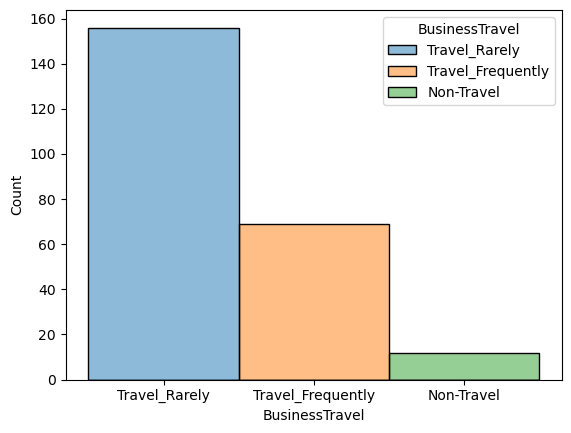

In [31]:
sns.histplot(data=data2, x="BusinessTravel",hue = "BusinessTravel")

In [32]:
data2.BusinessTravel.value_counts()

Travel_Rarely        156
Travel_Frequently     69
Non-Travel            12
Name: BusinessTravel, dtype: int64

# Leavers by Education

<AxesSubplot:xlabel='Education', ylabel='count'>

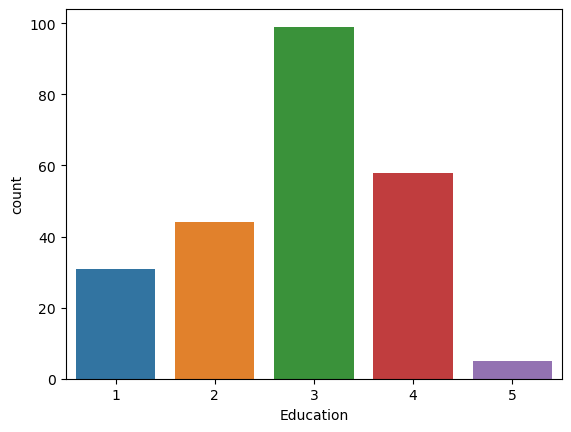

In [33]:
sns.countplot(data=data2, x='Education')


In [34]:
data2.Education.value_counts()

3    99
4    58
2    44
1    31
5     5
Name: Education, dtype: int64

# Leavers by Education Field

<AxesSubplot:xlabel='EducationField', ylabel='Count'>

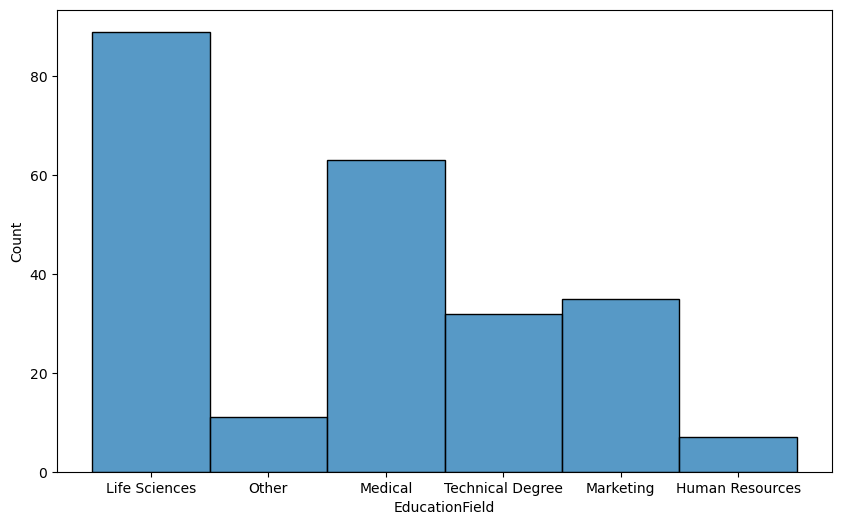

In [35]:
sns.histplot(data=data2, x="EducationField", figure=plt.figure(figsize=(10, 6)))

In [36]:
data2.EducationField.value_counts()

Life Sciences       89
Medical             63
Marketing           35
Technical Degree    32
Other               11
Human Resources      7
Name: EducationField, dtype: int64

# Leavers by Department

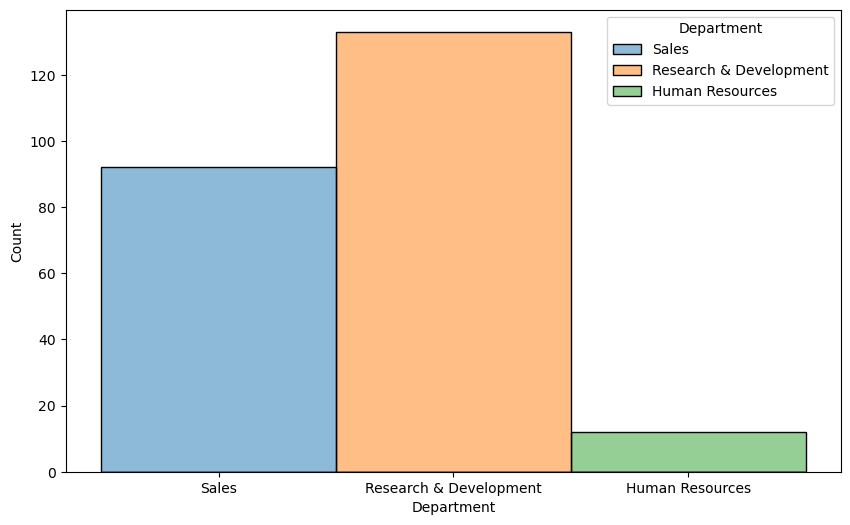

In [37]:
sns.histplot(data=data2, x="Department",hue = "Department", figure=plt.figure(figsize=(10, 6)))

plt.savefig('AttritionByDepartment.png')

In [38]:
data2.Department.value_counts()

Research & Development    133
Sales                      92
Human Resources            12
Name: Department, dtype: int64

# Leavers by Job Role

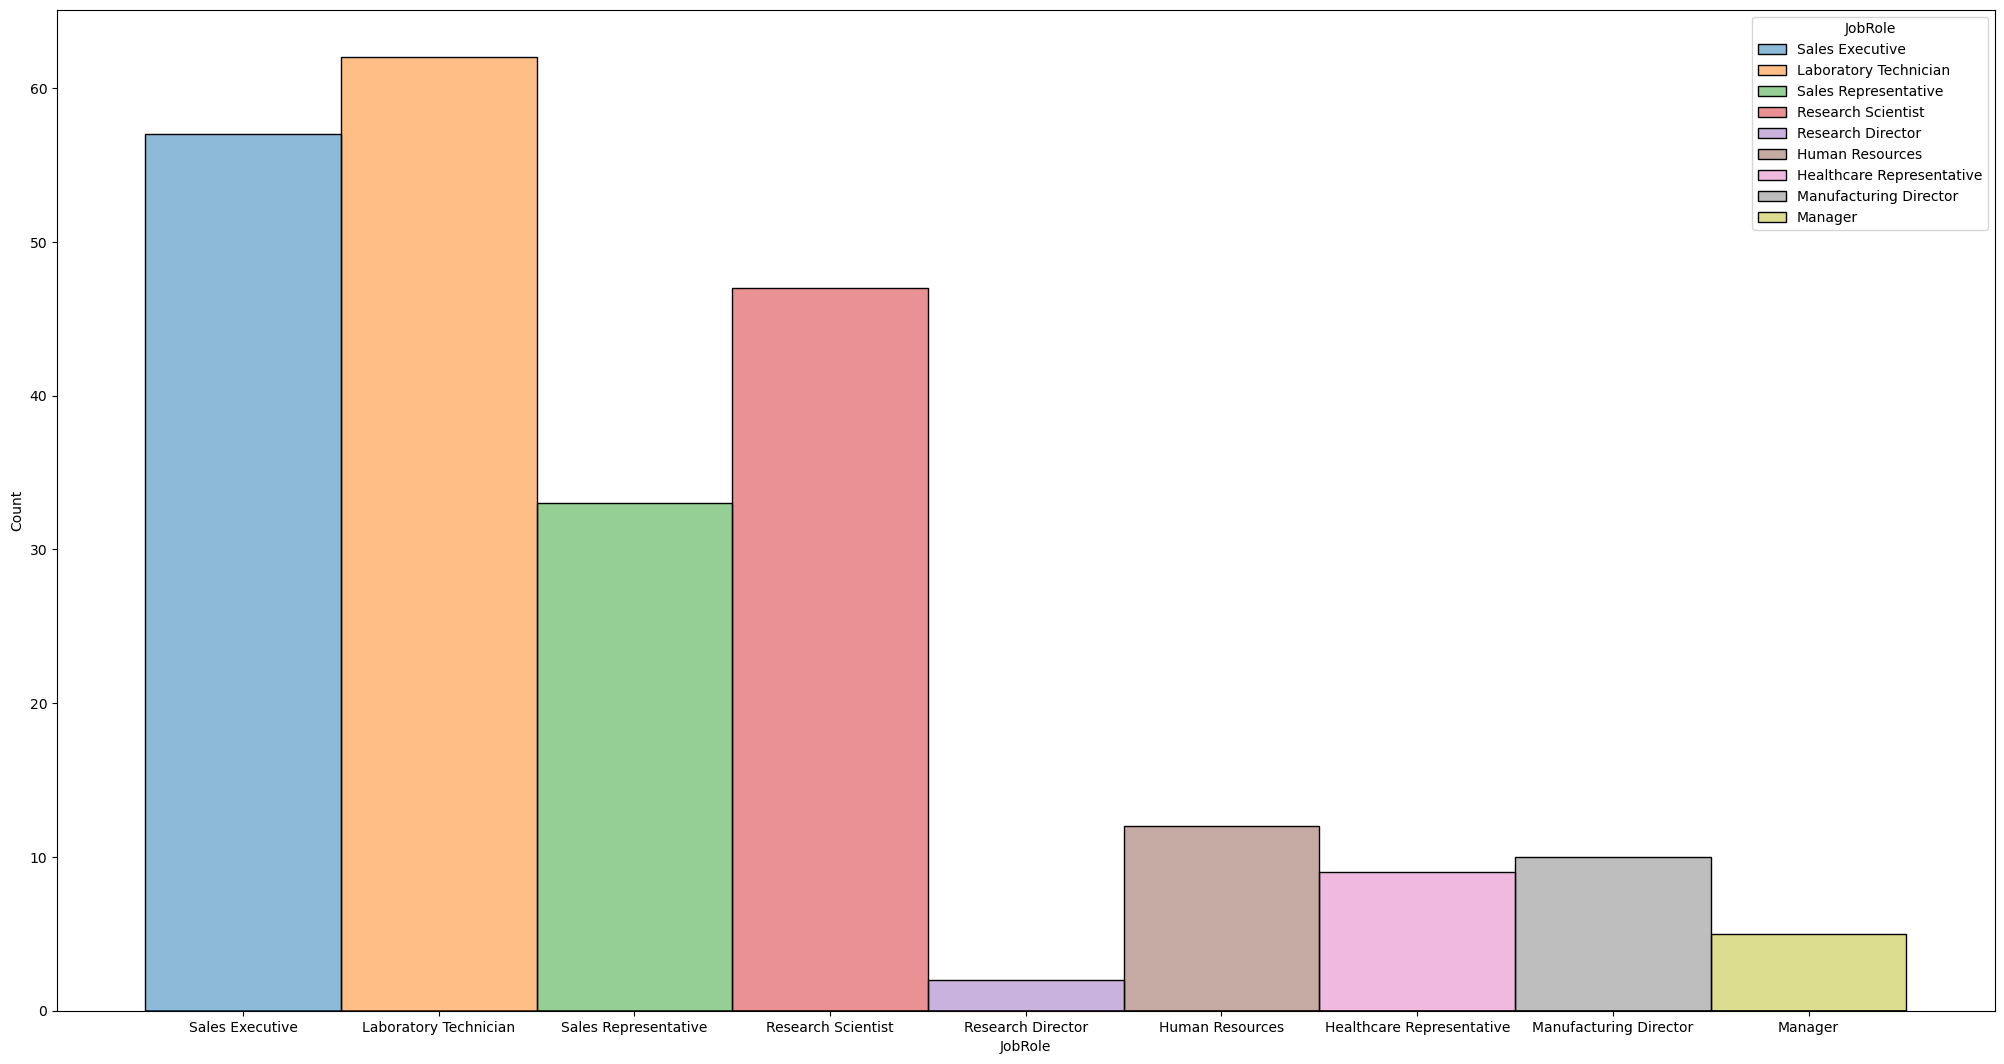

In [39]:
sns.histplot(data=data2, x="JobRole",hue = "JobRole", figure=plt.figure(figsize=(25, 13)))

plt.savefig('AttritionByJobrole.png')


In [40]:
data2.JobRole.value_counts()

Laboratory Technician        62
Sales Executive              57
Research Scientist           47
Sales Representative         33
Human Resources              12
Manufacturing Director       10
Healthcare Representative     9
Manager                       5
Research Director             2
Name: JobRole, dtype: int64

# Leavers by Job Level

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

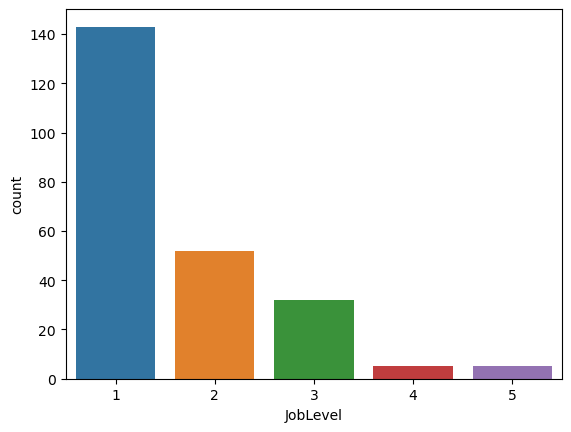

In [41]:
sns.countplot(data=data2, x='JobLevel')

In [42]:
data2.JobLevel.value_counts()

1    143
2     52
3     32
5      5
4      5
Name: JobLevel, dtype: int64

# Leavers because of Job Satisfaction

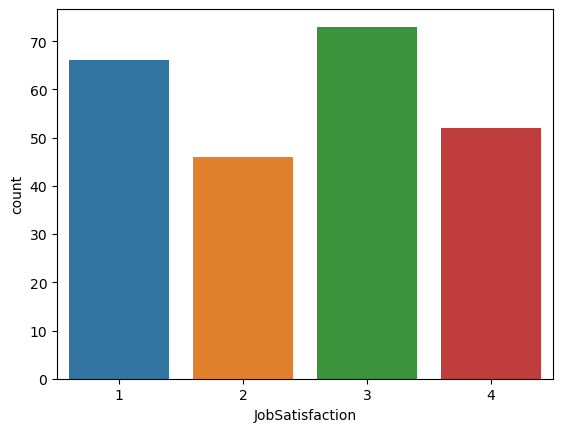

In [43]:
sns.countplot(data=data2, x='JobSatisfaction')

plt.savefig('AttritionBySatisfaction.png')

In [44]:
data2.JobSatisfaction.value_counts()

3    73
1    66
4    52
2    46
Name: JobSatisfaction, dtype: int64

# Leavers by Job Involvement

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

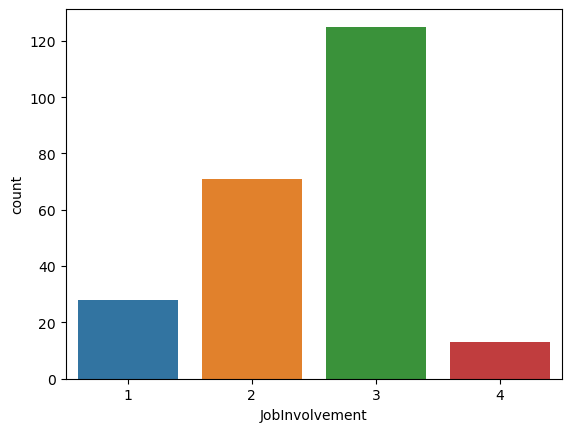

In [45]:
sns.countplot(data=data2, x='JobInvolvement')

In [46]:
data2.JobInvolvement.value_counts()   

3    125
2     71
1     28
4     13
Name: JobInvolvement, dtype: int64

# Leavers because of Company Environment

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

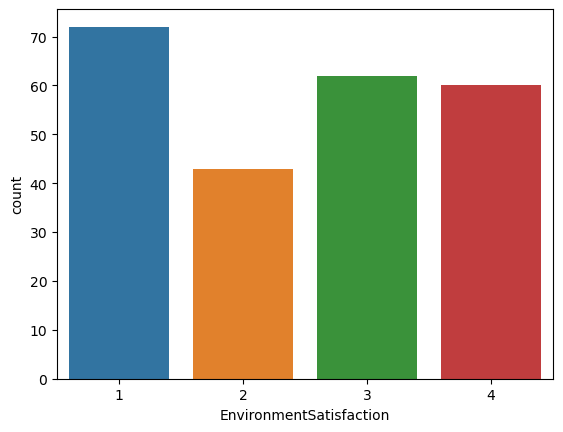

In [47]:
sns.countplot(data=data2, x='EnvironmentSatisfaction')

In [48]:
data2.EnvironmentSatisfaction.value_counts()  

1    72
3    62
4    60
2    43
Name: EnvironmentSatisfaction, dtype: int64

<AxesSubplot:xlabel='DailyRate', ylabel='count'>

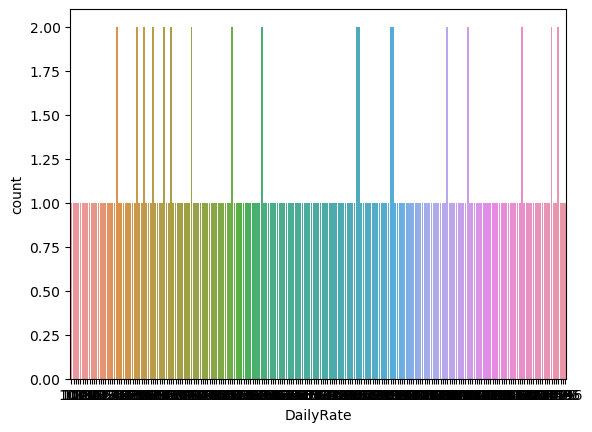

In [49]:
sns.countplot(data=data2, x='DailyRate')

# Minimum and Maximum Daily Rate of Overall employees 

In [50]:
minimum = emp['DailyRate'].min()
maximum = emp['DailyRate'].max()  


print("Minimum Daily salary is :", minimum )
print("Maximum Daily salary is :", maximum )

Minimum Daily salary is : 102
Maximum Daily salary is : 1499


# Minimum and Maximum Daily Rate of Employee who Leave the company

In [51]:
minimum = data2['DailyRate'].min()
maximum = data2['DailyRate'].max()  


print("Minimum daily salary is :", minimum )
print("Maximum daily salary is :", maximum )

Minimum daily salary is : 103
Maximum daily salary is : 1496


# Minimum and Maximum Hourly rate of Overall employees

In [52]:
minimum = emp['HourlyRate'].min()
maximum = emp['HourlyRate'].max()  


print("Minimum hourly salary is :", minimum )
print("Maximum hourly salary is :", maximum )

Minimum hourly salary is : 30
Maximum hourly salary is : 100


# Minimum and Maximum Hourly Rate of Employee who Leave the company

In [53]:
minimum = data2['HourlyRate'].min()
maximum = data2['HourlyRate'].max()  


print("Minimum hourly salary is :", minimum )
print("Maximum hourly salary is :", maximum )

Minimum hourly salary is : 31
Maximum hourly salary is : 100


# Minimum and Maximum Monthly rate of Overall employees

In [54]:
minimum = emp['MonthlyRate'].min()
maximum = emp['MonthlyRate'].max()  


print("Minimum Monthly Rate is :", minimum )
print("Maximum Monthly Rate is :", maximum )

Minimum Monthly Rate is : 2094
Maximum Monthly Rate is : 26999


# Minimum and Maximum MonthlyRate of Employee who Leave the company

In [55]:
minimum = data2['MonthlyRate'].min()
maximum = data2['MonthlyRate'].max()  


print("Minimum Monthly Rate is :", minimum )
print("Maximum Monthly Rate is :", maximum )

Minimum Monthly Rate is : 2326
Maximum Monthly Rate is : 26999


# Minimum and Maximum Monthly Income of Overall employees

In [56]:
minimum = emp['MonthlyIncome'].min()
maximum = emp['MonthlyIncome'].max()  


print("Minimum Monthly income is :", minimum )
print("Maximum Monthly income is :", maximum )

Minimum Monthly income is : 1009
Maximum Monthly income is : 19999


# Minimum and Maximum Monthly Income of Employee who Leave the company

In [57]:
minimum = data2['MonthlyIncome'].min()
maximum = data2['MonthlyIncome'].max()  


print("Minimum Monthly income is :", minimum )
print("Maximum Monthly income is :", maximum )

Minimum Monthly income is : 1009
Maximum Monthly income is : 19859


# Leavers By Marital Status

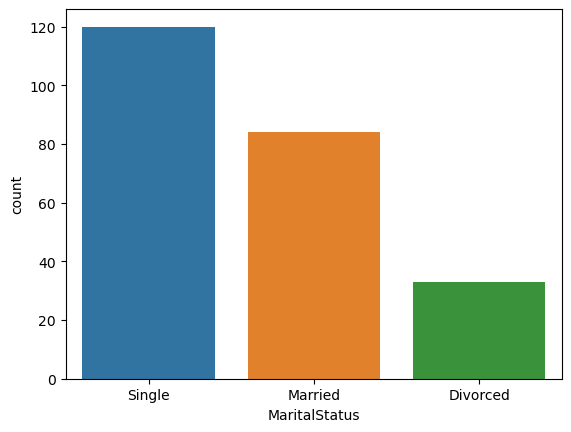

In [58]:
sns.countplot(data=data2, x='MaritalStatus')


plt.savefig('AttritionByMaritalStatus.png')

In [59]:
data2.MaritalStatus.value_counts()

Single      120
Married      84
Divorced     33
Name: MaritalStatus, dtype: int64

# Employee Leave Count because of Distance of office from home

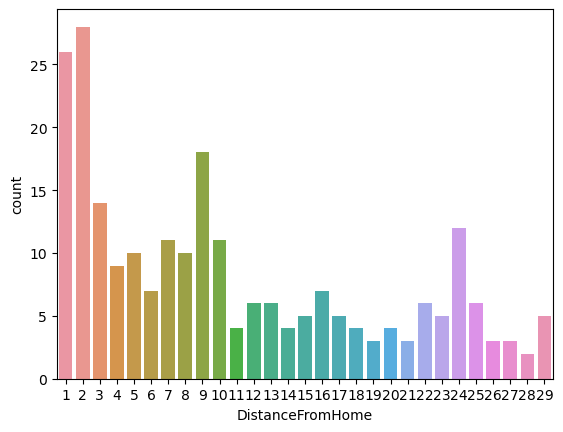

In [60]:
sns.countplot(data=data2, x='DistanceFromHome')

plt.savefig('AttritionByDistanceFromHome.png')

In [61]:
Distance = emp[(emp["Attrition"]=="Yes") & (emp["DistanceFromHome"]>10) 
          (emp["DistanceFromHome"]<25) ].value_counts().sum()
Distance

TypeError: 'Series' object is not callable

In [ ]:
Distance = emp[(emp["Attrition"]=="Yes") & (emp["DistanceFromHome"]>1) 
          & (emp["DistanceFromHome"]<10) ].value_counts().sum()
Distance

# Leavers by number of companies worked

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

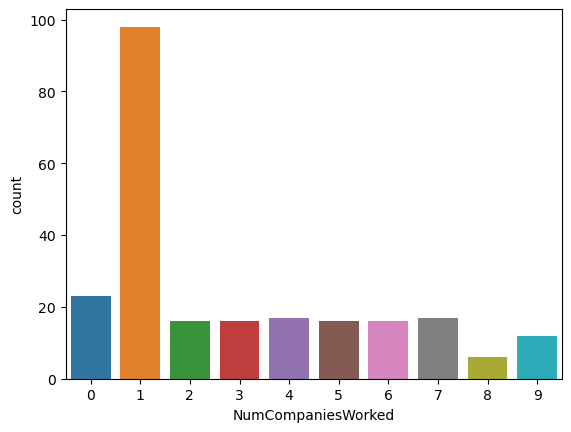

In [62]:
sns.countplot(data=data2, x='NumCompaniesWorked')

# Employee Leave Count because Over Time

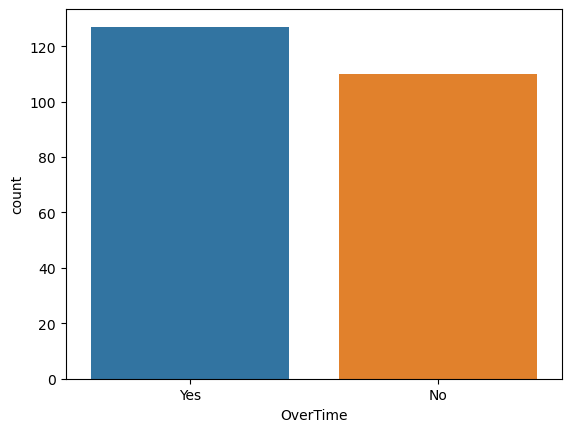

In [63]:
sns.countplot(data=data2, x='OverTime')

plt.savefig('AttritionByOverTime.png')

In [64]:
data2.OverTime.value_counts()

Yes    127
No     110
Name: OverTime, dtype: int64

# Attrition because of Performance Rating

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

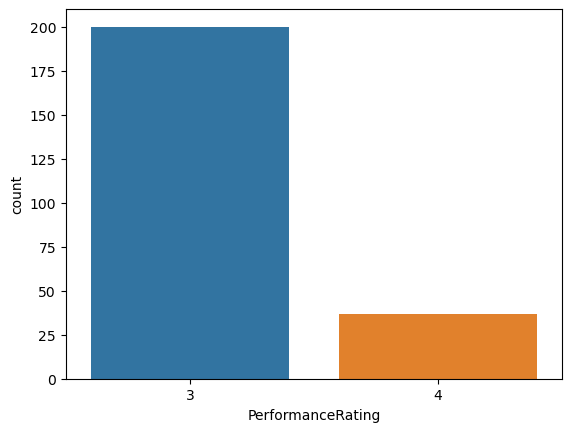

In [65]:
sns.countplot(data=data2, x='PerformanceRating')

In [66]:
data2.PerformanceRating.value_counts()

3    200
4     37
Name: PerformanceRating, dtype: int64

# Employee count who leaves the compnay because of Hike

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

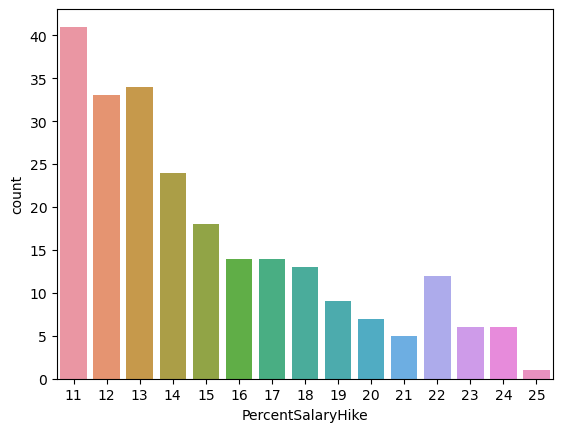

In [67]:
sns.countplot(data=data2, x='PercentSalaryHike')

In [68]:
data2.PercentSalaryHike.value_counts()

11    41
13    34
12    33
14    24
15    18
16    14
17    14
18    13
22    12
19     9
20     7
23     6
24     6
21     5
25     1
Name: PercentSalaryHike, dtype: int64

In [69]:
emp.RelationshipSatisfaction.unique()

array([1, 4, 2, 3], dtype=int64)

# Attrition count because of Relationship Satisfaction

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

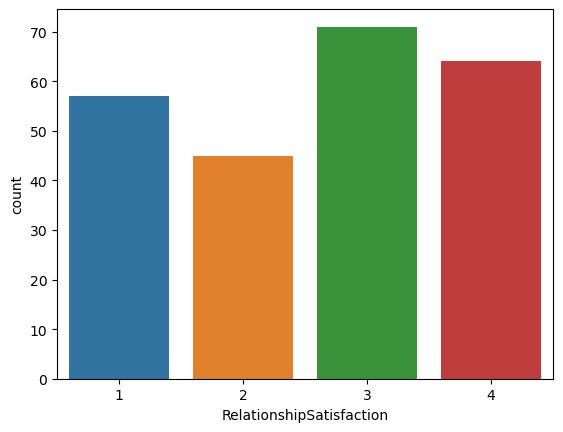

In [70]:
sns.countplot(data=data2, x='RelationshipSatisfaction')

In [71]:
data2.RelationshipSatisfaction.value_counts()

3    71
4    64
1    57
2    45
Name: RelationshipSatisfaction, dtype: int64

# Attrition Because of Stock option level

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

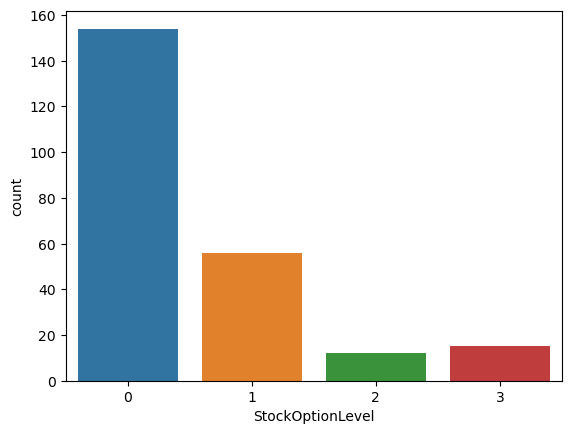

In [72]:
sns.countplot(data=data2, x='StockOptionLevel')

In [73]:
data2.StockOptionLevel.value_counts()

0    154
1     56
3     15
2     12
Name: StockOptionLevel, dtype: int64

# Count of Total working years of employees who leaves the company 

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

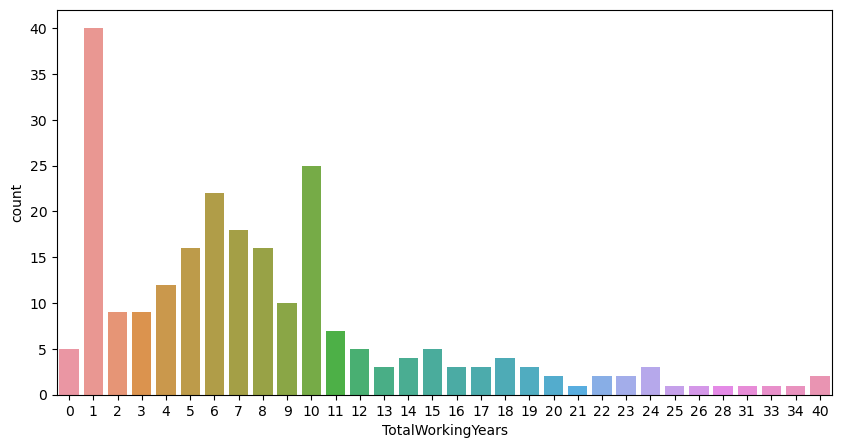

In [74]:
sns.countplot(data=data2, x="TotalWorkingYears", figure=plt.figure(figsize=(10, 5)))

In [75]:
data2.TotalWorkingYears.value_counts()

1     40
10    25
6     22
7     18
8     16
5     16
4     12
9     10
3      9
2      9
11     7
15     5
12     5
0      5
14     4
18     4
17     3
16     3
13     3
19     3
24     3
20     2
22     2
23     2
40     2
33     1
21     1
26     1
31     1
28     1
34     1
25     1
Name: TotalWorkingYears, dtype: int64

In [76]:
data2.YearsSinceLastPromotion.unique()

array([ 0,  1,  6,  2, 15,  4,  7,  9,  3, 13, 11,  5, 10, 14],
      dtype=int64)

# Leavers because of promotion

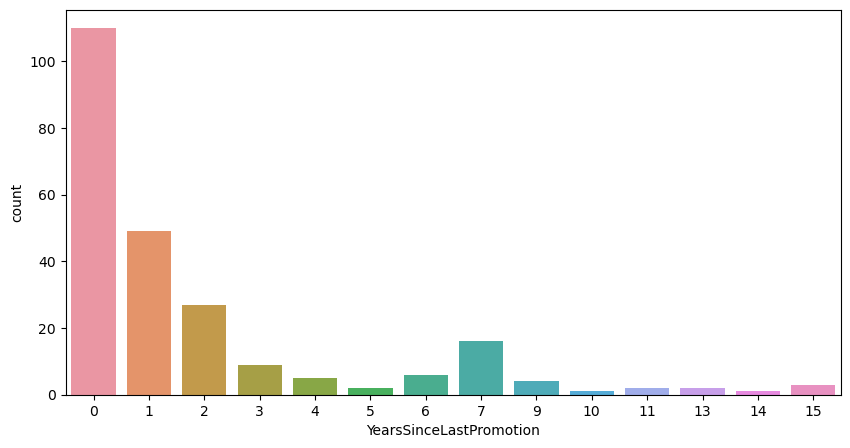

In [77]:
sns.countplot(data=data2, x="YearsSinceLastPromotion", figure=plt.figure(figsize=(10, 5)))

plt.savefig('AttritionByLastPromotion.png')

# Leavers because of training

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

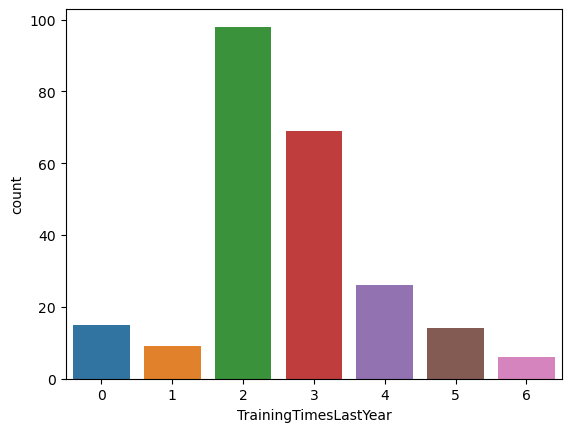

In [78]:
sns.countplot(data=data2, x='TrainingTimesLastYear')

In [79]:
data2.TrainingTimesLastYear.value_counts()

2    98
3    69
4    26
0    15
5    14
1     9
6     6
Name: TrainingTimesLastYear, dtype: int64

# Leavers because of Work life Balance

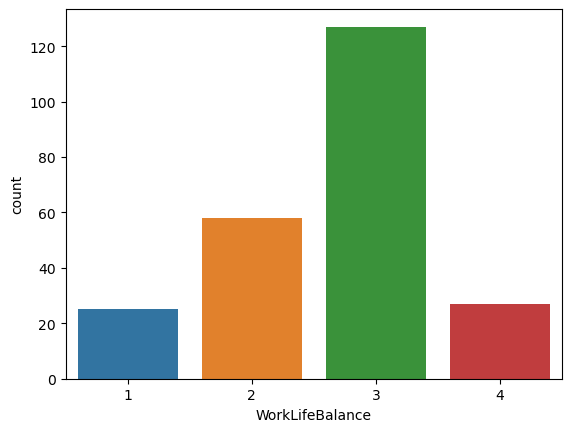

In [80]:
sns.countplot(data=data2, x='WorkLifeBalance')

plt.savefig('Sagar.png')

In [81]:
data2.WorkLifeBalance.value_counts()

3    127
2     58
4     27
1     25
Name: WorkLifeBalance, dtype: int64

# Value count of employee based on how many years worked in company

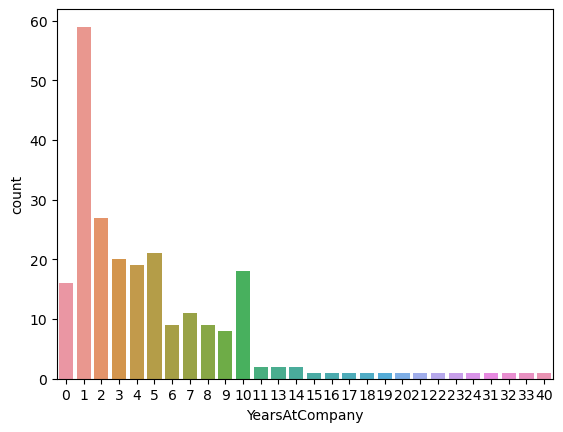

In [82]:
sns.countplot(data=data2, x='YearsAtCompany')

plt.savefig('AttritionByYearsAtCompany.png')

In [83]:
data2.YearsAtCompany.value_counts()

1     59
2     27
5     21
3     20
4     19
10    18
0     16
7     11
8      9
6      9
9      8
14     2
11     2
13     2
18     1
15     1
33     1
19     1
24     1
21     1
31     1
20     1
17     1
32     1
16     1
40     1
22     1
23     1
Name: YearsAtCompany, dtype: int64

# Count of employee working in current Role

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

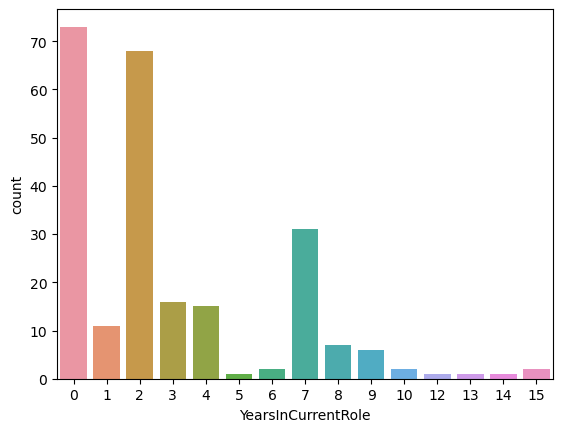

In [84]:
sns.countplot(data=data2, x='YearsInCurrentRole')

In [85]:
data2.YearsInCurrentRole.value_counts()

0     73
2     68
7     31
3     16
4     15
1     11
8      7
9      6
15     2
10     2
6      2
14     1
13     1
12     1
5      1
Name: YearsInCurrentRole, dtype: int64

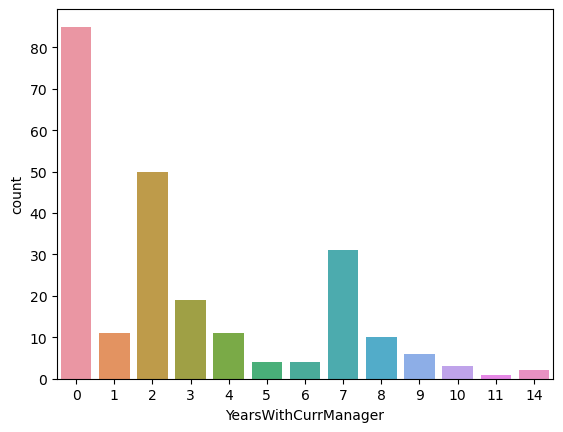

In [86]:
sns.countplot(data=data2, x='YearsWithCurrManager')

plt.savefig('AttritionByCurrManager.png')

# Machine Learning Models

In [87]:
emp

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Converting Categorical Variables into numeric to make it model ready By using Label Encoding and One-hot encoding

In [88]:
label_encoder = preprocessing.LabelEncoder()
emp["Attrition"] = label_encoder.fit_transform(emp["Attrition"])

In [89]:
label_encoder = preprocessing.LabelEncoder()
emp["Gender"] = label_encoder.fit_transform(emp["Gender"])

In [90]:
label_encoder = preprocessing.LabelEncoder()
emp["OverTime"] = label_encoder.fit_transform(emp["OverTime"])

In [91]:
label_encoder = preprocessing.LabelEncoder()
emp["Over18"] = label_encoder.fit_transform(emp["Over18"])

In [92]:
emp1 = pd.get_dummies(emp)

In [93]:
emp1.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,1,61,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,...,1,0,0,0,0,0,0,0,1,0


In [94]:
emp1

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,1,61,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,1,41,...,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,1,2062,4,1,42,...,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,1,2064,2,1,87,...,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,1,2065,4,1,63,...,0,0,0,0,0,1,0,0,1,0


In [95]:
x = emp1.drop('Attrition', axis=1)
y = emp1['Attrition'] 

In [96]:
x

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,1,1,2,0,94,3,...,0,0,0,0,0,1,0,0,0,1
1,49,279,8,1,1,2,3,1,61,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,2,1,4,4,1,92,2,...,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,4,1,5,4,0,56,3,...,0,0,0,0,1,0,0,0,1,0
4,27,591,2,1,1,7,1,1,40,3,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,1,41,4,...,1,0,0,0,0,0,0,0,1,0
1466,39,613,6,1,1,2062,4,1,42,2,...,0,0,0,0,0,0,0,0,1,0
1467,27,155,4,3,1,2064,2,1,87,4,...,0,0,1,0,0,0,0,0,1,0
1468,49,1023,2,3,1,2065,4,1,63,2,...,0,0,0,0,0,1,0,0,1,0


In [97]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [98]:
# Splitting the Data into Train and Test

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 7)

# Logistic Regression

In [100]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
result1 = np.mean(y_test == pred)
result1

C:\Users\Sagar Gitaye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8458049886621315

# Building Decision Tree Classifier using C5.O or Entropy Criteria

In [101]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

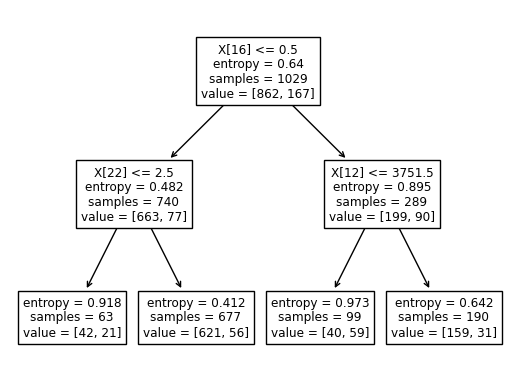

In [102]:
tree.plot_tree(model);

In [103]:
preds = model.predict(x_test)

In [104]:
pd.crosstab(y_test,preds)

col_0,0,1
Attrition,,
0,346,25
1,51,19


In [105]:
result2 = np.mean(preds==y_test)
result2

0.8276643990929705

# Building Decision Tree Classifier (CART) using Gini Criteria

In [106]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=2)

In [107]:
model_gini.fit(x_train, y_train)
pred=model.predict(x_test)
result3 = np.mean(preds==y_test)
result3

0.8276643990929705

# Creating K-Fold cross validation

In [108]:
kfold = KFold(n_splits = 14, random_state = 7, shuffle = True)

# Bagging Classifier

In [109]:
model = BaggingClassifier(n_estimators = 100,random_state = 7)
result = cross_val_score(model,x,y,cv=kfold)
result4 = result.mean()
result4

0.8537414965986396

In [110]:
from sklearn.metrics import accuracy_score

# Random Forest

In [111]:
model = RandomForestClassifier(n_estimators = 175, max_features = 10, random_state = 7)
result = cross_val_score(model,x,y,cv=kfold)
result5 = result.mean()
result5

0.8578231292517008

In [112]:
model = RandomForestClassifier(n_estimators = 175, max_features = 10, random_state = 7)
model.fit(x_train,y_train)
pred_test = model.predict(x_test)
result = np.mean(y_test == pred_test)
result

0.8571428571428571

In [113]:
from sklearn.metrics import confusion_matrix

In [114]:
cm = confusion_matrix(y_test, pred_test)
print(cm)

[[365   6]
 [ 57  13]]


# false positive

In [115]:
(58)/(58+12)

0.8285714285714286

# False negative

# Adaboost

In [116]:
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(("logistic",model1))
model2 = DecisionTreeClassifier()
estimators.append(("cart",model2))
model3 = SVC()
estimators.append(("svm",model3))


model = VotingClassifier(estimators)
result = cross_val_score(model,x,y,cv=kfold)
result.mean()

C:\Users\Sagar Gitaye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sagar Gitaye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

0.8414965986394558

#  k-nearest neighbors algorithm(KNN)

In [117]:
kfold = KFold(n_splits = 10)

In [118]:
model = KNeighborsClassifier(n_neighbors = 14)
result = cross_val_score(model,x,y,cv=kfold)
result6 = result.mean()
result6

C:\Users\Sagar Gitaye\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Sagar Gitaye\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

0.8387755102040815

# Support Vector Classifier(SVM)

In [119]:
model1 = SVC(C = 15, gamma = 0.002)
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
result7 = np.mean(y_test == pred)
result7

0.8412698412698413

In [120]:
model_outputs = {
    "Logistic Regression": result1,
    "Decision Tree (Entropy)": result2,
    "Decision Tree (Gini)": result3,
    "Bagging": result4,
    "Random Forest": result5,
    "KNN": result6,
    "SVC": result7
}

df = pd.DataFrame.from_dict(model_outputs, orient='index', columns=['Accuracy'])

print(df)

                         Accuracy
Logistic Regression      0.845805
Decision Tree (Entropy)  0.827664
Decision Tree (Gini)     0.827664
Bagging                  0.853741
Random Forest            0.857823
KNN                      0.838776
SVC                      0.841270


In [121]:
model = RandomForestClassifier(random_state = 7)

param_grid = {
    'n_estimators': [50,75,100,125,150,175,200],
    'min_samples_split': [2,4,6,8,10 ],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_depth': [5,10,15,20,25]
    
}

grid = GridSearchCV(model, param_grid = param_grid, cv=kfold)
grid.fit(x,y)

params = grid.best_estimator_

params


RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=175, random_state=7)

In [122]:
grid.best_params_, grid.best_score_

({'max_depth': 10,
  'min_samples_leaf': 3,
  'min_samples_split': 10,
  'n_estimators': 175},
 0.8605442176870748)

In [123]:
params.fit(x_train, y_train)
probs = params.predict_proba(x_test) 
probs = probs[:, 1] 
params_roc_auc = roc_auc_score(y_test, probs)
print('AUC score: %.3f' % params_roc_auc)

AUC score: 0.813


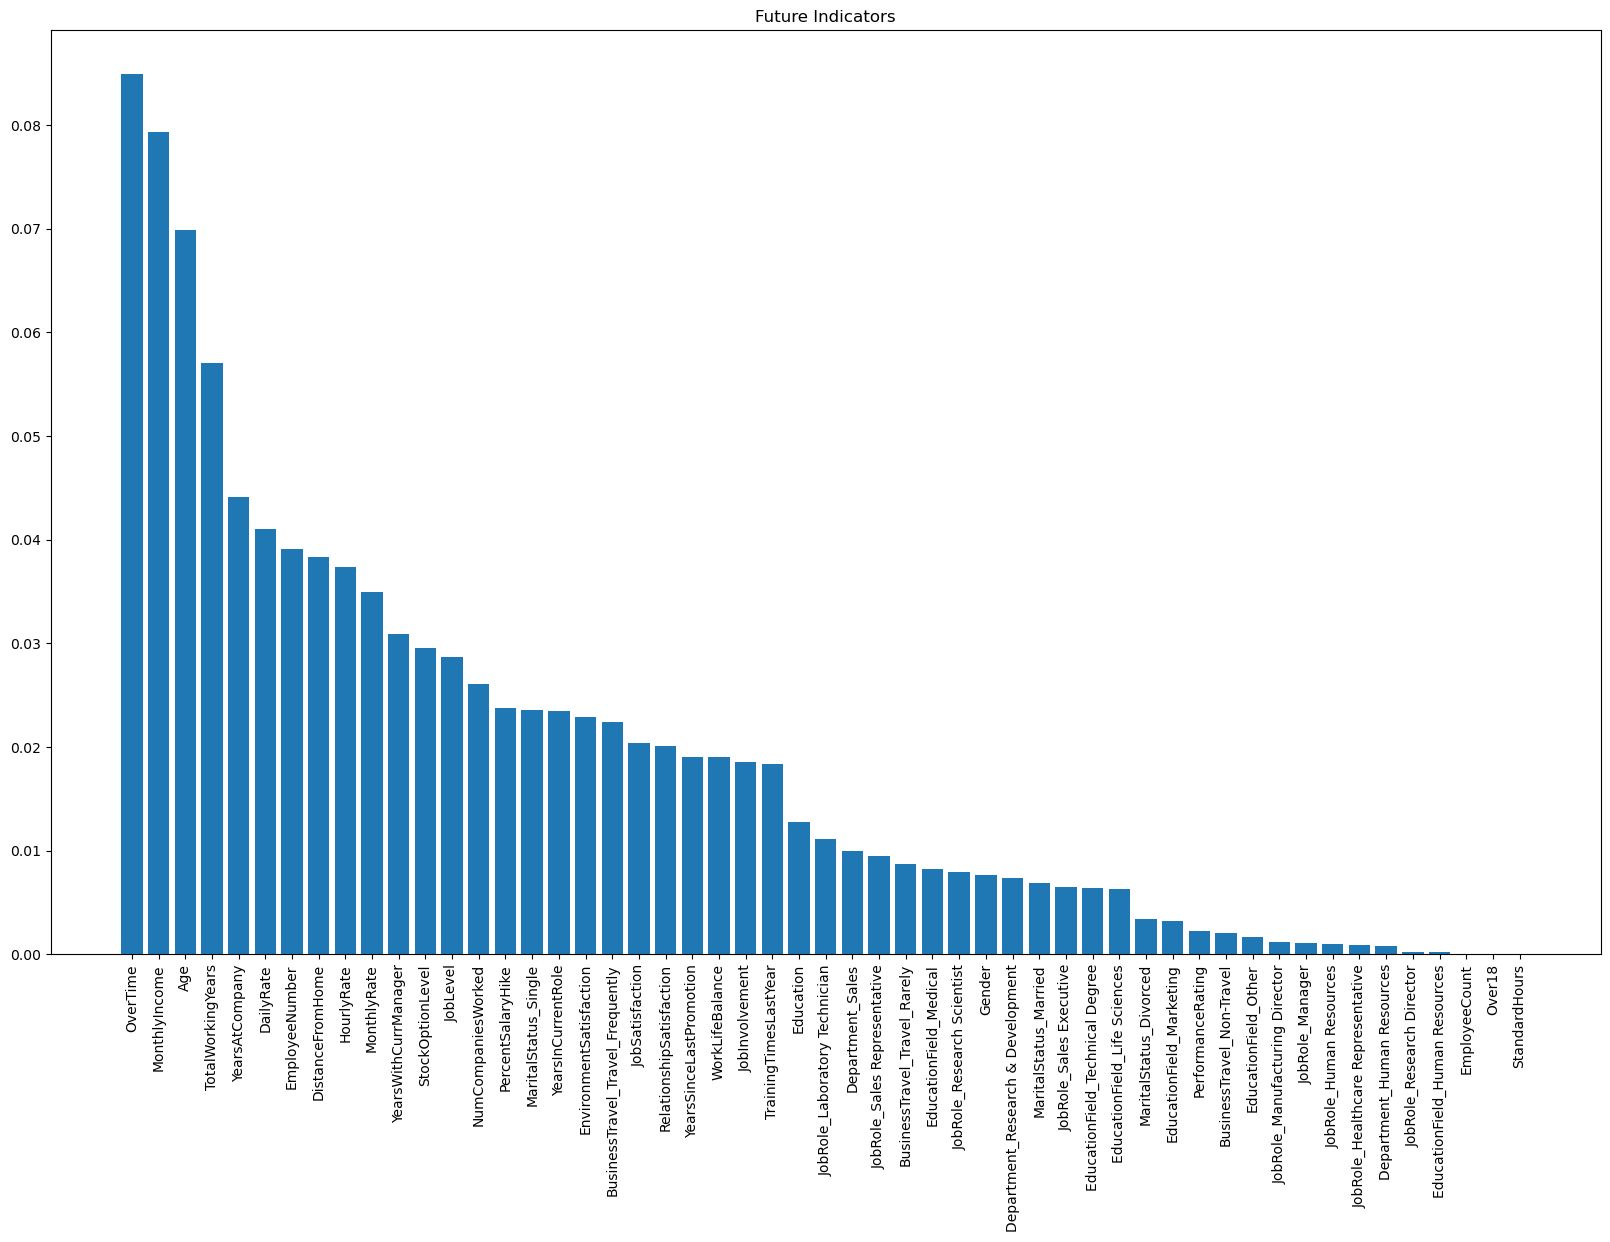

<Figure size 640x480 with 0 Axes>

In [124]:
indicators = params.feature_importances_
names = sorted(range(len(indicators)), key=lambda i:indicators[i], reverse=True)
labels = [x_test.columns[i] for i in names]

plt.figure(figsize=(20, 12))
plt.title("Future Indicators")
plt.bar(range(x_test.shape[1]), [indicators[i] for i in names])
plt.xticks(range(x_test.shape[1]), labels,rotation=90)
plt.show()

plt.savefig("Sagar3.png") 